시작 연도를 입력하세요 : 2010
마지막 연도를 입력하세요 : 2020
기온 변화를 측정할 달을 입력하세요 : 2
2010년부터 2020까지 2월의 기온 변화
2월 최저기온 평균 : 
[-0.1, -0.5, -3.2, -1.8, 0.3, -0.6, -1.7, -2.2, -4.2, -0.9, 0.2]
2월 최고기온 평균 : 
[8.7, 9.5, 5.9, 7.5, 9.3, 9.0, 8.3, 8.8, 7.1, 9.1, 10.4]


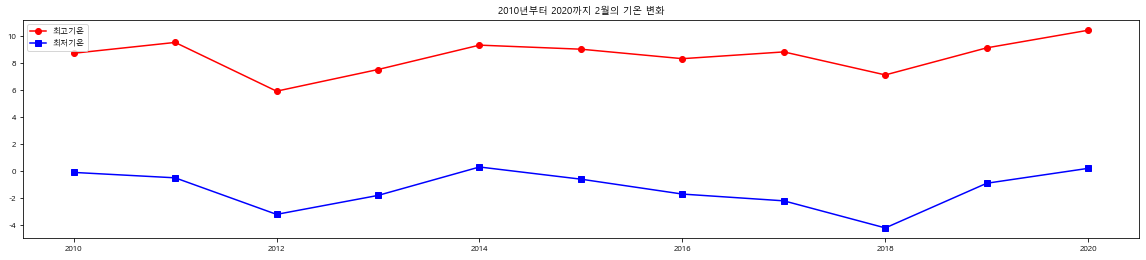

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

df=pd.read_csv('daegu_utf8.csv')
high_temp=[]
low_temp=[]
x_year=[]

def high_low_temp():
    start_year=int(input('시작 연도를 입력하세요 : '))
    last_year=int(input('마지막 연도를 입력하세요 : '))
    month=int(input('기온 변화를 측정할 달을 입력하세요 : '))

    # 날짜 컬럼 자료형 변환
    df['날짜']=pd.to_datetime(df['날짜'])
    df_year=df['날짜'].dt.year
    df_month=df['날짜'].dt.month
    
    # 조건에 맞는 데이터프레임 생성
    cond_df=df[(df_year>=start_year)&(df_year<=last_year)&(df_month==month)]


    for my_year in range(start_year, last_year+1):
        max_temp_mean=round(cond_df[(cond_df['날짜'].dt.year==my_year)]['최고기온'].mean(), 1)
        min_temp_mean=round(cond_df[(cond_df['날짜'].dt.year==my_year)]['최저기온'].mean(), 1)
        high_temp.append(max_temp_mean)
        low_temp.append(min_temp_mean)
        x_year.append(my_year)   # x축 라벨을 위한 리스트
    
    # 그래프 그리기
    plt.figure(figsize=(20,4))
    plt.plot(x_year, high_temp, 'red', marker='o', label='최고기온')
    plt.plot(x_year, low_temp, 'blue', marker='s', label='최저기온')
    
    # 다른 운영체제에서도 적용할 수 있도록 한글 폰트 깨짐 방지
    if platform.system()=='Windows':
        plt.rc('font', family='Malgun Gothic', size=8)
    else:
        plt.rc('font', family='AppleGothic', size=8)
        
    print(f'{start_year}년부터 {last_year}까지 {month}월의 기온 변화')
    print(f'{month}월 최저기온 평균 : \n{low_temp}')
    print(f'{month}월 최고기온 평균 : \n{high_temp}')
    
    # 마이너스 부호 깨짐 방지
    plt.rcParams['axes.unicode_minus']=False
    plt.title(f'{start_year}년부터 {last_year}까지 {month}월의 기온 변화')
    plt.legend(loc=2)
    plt.show()
    



high_low_temp()

======================================================================

In [100]:
import csv
import matplotlib.pyplot as plt

def draw_graph_on_date(start_year, end_year, month):
    with open('daegu_utf8.csv', encoding='utf-8') as f:
        data=csv.reader(f)
        next(data)
        high_temp=[]
        low_temp=[]
        x_year=[]
        
        
        for row in data:
            if row[-1]!='' and row[-2]!='':
                my_year=int(row[0].split('-')[0])
                my_month=int(row[0].split('-')[1])
                if (my_year>=start_year) and (my_year<=end_year) and (my_month==month):
                    count_year=start_year
                    while count_year<=end_year:
                        sub_month_low=[]
                        sub_month_high=[]
                            if count_year==my_year:
                                
                                #print(row)
                                sub_month_low.append(float(row[-2]))
                                #print('sub_month_low', sub_month_low, sep='\n')
                                sub_month_high.append(float(row[-1]))
                                #print('sub_month_high', sub_month_high, sep='\n')
                                high_temp.append(my_avg(sub_month_high))
                                low_temp.append(my_avg(sub_month_low))
    #                         print('high ===> \n', high_temp)
    #                         print('low ====> \n', low_temp)

                        count_year+=1
    print('high_temp => ', high_temp, sep='\n')
    print('low_temp => ', low_temp, sep='\n')
                

# 리스트 평균 구하는 함수
def my_avg(my_list):
    total=0
    for num in my_list:
        total+=num
    return total/len(my_list)
            
start_year=int(input('시작 연도를 입력하세요 : '))
end_year=int(input('마지막 연도를 입력하세요 : '))
month=int(input('조사하고 싶은 월을 입력하세요 : '))
draw_graph_on_date(start_year, end_year, month)

시작 연도를 입력하세요 : 2010
마지막 연도를 입력하세요 : 2014
조사하고 싶은 월을 입력하세요 : 3
high_temp => 
[9.4, 7.6, 10.2, 8.4, 10.2, 8.9, 5.6, 6.9, 6.4, 3.5, 10.1, 16.4, 14.6, 12.4, 16.1, 9.0, 8.9, 7.8, 16.7, 24.5, 11.3, 9.1, 12.5, 12.4, 7.9, 10.0, 13.4, 16.1, 15.2, 13.4, 10.4, 8.8, 6.6, 5.7, 8.8, 11.0, 12.9, 10.0, 11.1, 7.9, 11.4, 13.8, 17.3, 20.2, 20.1, 10.6, 7.5, 10.2, 14.6, 18.3, 13.0, 13.8, 10.3, 10.3, 12.6, 8.8, 11.2, 13.8, 15.2, 13.5, 19.0, 22.5, 15.9, 8.9, 10.5, 9.8, 7.7, 12.1, 12.5, 12.6, 12.6, 12.2, 5.9, 7.2, 9.9, 14.6, 14.3, 10.5, 15.5, 17.6, 12.4, 12.2, 15.5, 10.1, 8.4, 11.5, 10.3, 12.3, 19.4, 19.5, 20.8, 17.3, 14.1, 12.9, 7.8, 9.5, 12.6, 15.7, 19.0, 17.8, 22.2, 26.9, 20.9, 15.0, 19.6, 16.0, 10.6, 16.4, 19.1, 20.4, 20.0, 21.3, 15.2, 12.5, 13.8, 16.5, 16.0, 12.2, 16.1, 19.9, 21.8, 16.3, 15.3, 16.1, 11.6, 12.6, 12.8, 11.4, 10.1, 8.2, 7.6, 9.9, 8.8, 11.3, 16.9, 8.7, 7.3, 9.1, 16.4, 20.9, 22.0, 23.1, 14.0, 12.9, 10.6, 18.0, 20.9, 20.6, 19.6, 18.4, 24.3, 26.4, 17.4, 20.1, 21.5]
low_temp => 
[4.7, 3.9, 0.7, 

시작 연도를 입력하세요 : 2001
마지막 연도를 입력하세요 : 2021
조사하고 싶은 월을 입력하세요 : 8
8월 최저기온 평균 : 
[23.7, 22.1, 21.7, 22.4, 22.9, 24.3, 24.2, 22.2, 22.2, 25.0, 23.1, 24.5, 25.0, 21.7, 22.0, 23.2, 22.5, 23.7, 23.7, 24.8, 22.4]
8월 최고기온 평균 : 
[31.4, 28.5, 29.2, 30.7, 31.0, 33.3, 32.0, 30.7, 29.7, 33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2, 33.3, 30.5]


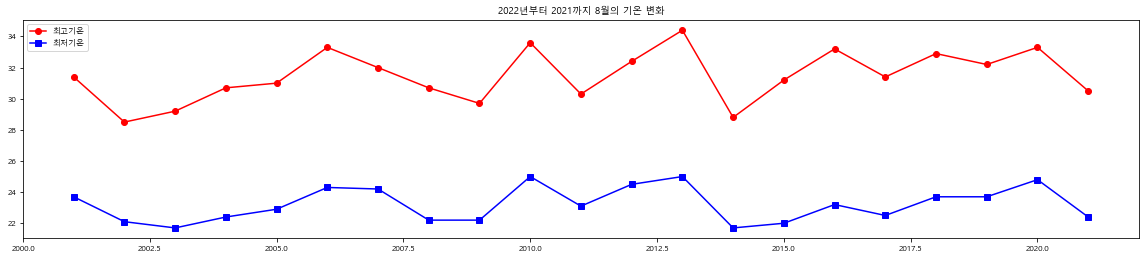

In [6]:
import csv
import matplotlib.pyplot as plt
import platform
    
high_temp=[]  # 연도별 최고온도 평균을 담는 리스트
low_temp=[]   # 연도별 최저온도 평균을 담는 리스트
x_year=[]  # 그래프 그릴 때 x축을 위한 리스트

def draw_graph_on_date(start_year, end_year, month):
    # start_year부터 end_year까지 돌리는 while문
    while start_year<=end_year:
        x_year.append(start_year)
        
        # 얘를 while문 안에 안 넣으면 데이터를 안 읽어옴
        with open('daegu_utf8.csv', encoding='utf-8') as f:
            data=csv.reader(f)
            next(data)
            
            # 하나의 년도 각 일자의 최저온도, 최고온도 담는 리스트 => 나중에 평균 계산하려고
            sub_month_low=[]
            sub_month_high=[]

            
            
            for row in data:
                my_year=int(row[0].split('-')[0])   # row의 연도
                my_month=int(row[0].split('-')[1])  # row의 월

                
                # 입력받은 년도와 row의 년도가 일치하고 입력받은 월과 row의 월이 일치한다면
                if my_year==start_year and my_month==month:
                    sub_month_low.append(float(row[-2]))
                    sub_month_high.append(float(row[-1]))
                    
            # --------------- 모든 row를 돌아서 입력받은 년, 입력받은 월의 최고온도, 최저온도를 리스트에 담았음
            
            # 연도별 최고, 최저온도 평균을 담는 리스트에 sub_month_high, sub_month_low의 평균을 계산해서 하나씩 추가
            high_temp.append(round(my_avg(sub_month_high), 1))
            low_temp.append(round(my_avg(sub_month_low), 1))

            start_year+=1
        
    # 그래프 그리기
    plt.figure(figsize=(20,4))
    plt.plot(x_year, high_temp, 'red', marker='o', label='최고기온')
    plt.plot(x_year, low_temp, 'blue', marker='s', label='최저기온')
    
    # 다른 운영체제에서도 적용할 수 있도록 한글 폰트 깨짐 방지
    if platform.system()=='Windows':
        plt.rc('font', family='Malgun Gothic', size=8)
    else:
        plt.rc('font', family='AppleGothic', size=8)
        
        print(f'{start_year}년부터 {last_year}까지 {month}월의 기온 변화')
    print(f'{month}월 최저기온 평균 : \n{low_temp}')
    print(f'{month}월 최고기온 평균 : \n{high_temp}')
    
    # 마이너스 부호 깨짐 방지
    plt.rcParams['axes.unicode_minus']=False
    plt.title(f'{start_year}년부터 {end_year}까지 {month}월의 기온 변화')
    plt.legend(loc=2)
    plt.show()

                        
# 리스트 평균 구하는 함수
def my_avg(my_list):
    total=0
    for num in my_list:
        total+=num
    return total/len(my_list)
            
start_year=int(input('시작 연도를 입력하세요 : '))
end_year=int(input('마지막 연도를 입력하세요 : '))
month=int(input('조사하고 싶은 월을 입력하세요 : '))
draw_graph_on_date(start_year, end_year, month)

## a=[9.4, 7.6, 10.2, 8.4, 10.2, 8.9, 5.6, 6.9, 6.4, 3.5, 10.1, 16.4, 14.6, 12.4, 16.1, 9.0, 8.9, 7.8, 16.7, 24.5, 11.3, 9.1, 12.5, 12.4, 7.9, 10.0, 13.4, 16.1, 15.2, 13.4, 10.4]
total=0
for num in a:
    total+=num

print(total/len(a))